In [1]:
import pyodbc
import pandas as pd

In [2]:
 def connectToDatabase():   
    '''
    Connect to the SQL Server. Note the insecurity here
    '''
    try:
        conn = pyodbc.connect('Driver={SQL Server};'
                              'Server=LCB-SQL.uccob.uc.edu\BANA4143;'
                              'Database=GroceryStoreSimulator;'
                              'uid=nguye2dc;'   
                              'pwd=P@ssword1;')
    except Exception as e: 
        print(e)
        conn = None
    return conn

In [3]:
def getQuery():
    '''
    The query we use to extract data from our SQL Server
    '''
    # This can't go wrong so we don't need error handling
    query =   " SELECT P.Serving_Size AS SS,P.Calories, B.Brand " + \
              " FROM tProduct AS P " + \
              "INNER JOIN tBrand AS B "+ \
              "ON P.BrandID = B.BrandID " + \
              "ORDER BY B.Brand ASC"
    return query

In [4]:
conn = connectToDatabase()

In [5]:
#query2=    '''USE GroceryStoreSimulator
              #SELECT P.Serving_Size AS SS , P.Calories, B.Brand 
              #FROM tProduct AS P
              #INNER JOIN tBrand AS B 
              #ON P.BrandID = B.BrandID
              #ORDER BY B.Brand ASC'''

In [6]:
#DF = pd.read_sql(query2,conn)

In [7]:
SQLQueryDF = pd.read_sql(getQuery(), conn)


C:\Users\vippr\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [8]:
SQLQueryDF

,SS,Calories,Brand
0,1.3,150.0,2-D-Extreme
1,8.0,120.0,A & W
2,8.0,0.0,Acqua Panna
3,NaN,NaN,Baby Bottle Pop
4,0.5,130.0,Bakers & Chefs
...,...,...,...
494,1.0,150.0,Zapp's
495,1.0,150.0,Zapp's
496,1.0,150.0,Zapp's
497,1.0,150.0,Zapp's


In [9]:
import matplotlib.pyplot as plt

In [13]:
aveCal=SQLQueryDF.groupby("Brand")["Calories"].mean().round(2)

In [39]:
SQLQueryDF.groupby("Brand")["Calories"].max()

Brand
2-D-Extreme                   150.0
A & W                         120.0
Acqua Panna                     0.0
Baby Bottle Pop                 NaN
Bakers & Chefs                130.0
                              ...  
Weight Watchers               100.0
Weight Watchers Smart Ones    260.0
Yoplait                       190.0
Zapp's                        150.0
Zero                            0.0
Name: Calories, Length: 190, dtype: float64

In [27]:
sortedDF=SQLQueryDF[(SQLQueryDF['Calories'] >= 250)]

In [33]:
sortedCalDF=sortedDF.groupby("Brand")["Calories"].mean().round(2)

In [34]:
sortedCalDF

Brand
Blumetti's                            270.00
Cloetta                               310.00
Cup Noodles                           300.00
Doritos Black Pepper Jack             260.00
Eating Right                          307.50
Healthy Choice                        380.00
Healthy Choice Café Steamers          302.50
Healthy Choice Complete Selections    326.67
Hershey's                             400.00
Kraft                                 270.00
Maruchan Instant Lunch                290.00
Nissin Chow                           250.00
Planters                              335.00
South Beach Diet                      275.00
Starkist                              250.00
Weight Watchers Smart Ones            255.00
Name: Calories, dtype: float64

<AxesSubplot:xlabel='Brand'>

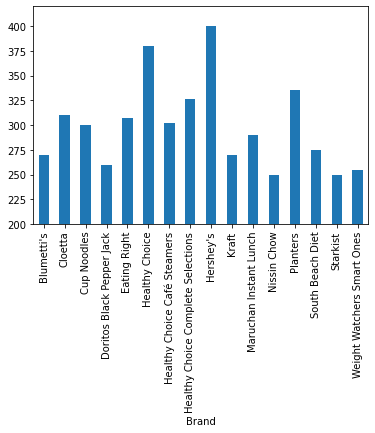

In [37]:
sortedCalDF.plot.bar(ylim=(200,420))

Intepretaion and Analysis: To import the data, we first connected to SQL Server through SSMS login credentials. We imported the Brand table and Product Table from GroceryStoreSimulator to get the serving size as well as calories columns.
We wanted to see the relationship between brands and calories. We calculated the average calories per brand as well as finding the maximum calories per brand.
We realized that we could not include all the Brands into our graph because there are too many brands to display clearly on the x-axis. Looking at maximum calories per brand, we decided to only include brands that have 250 calories or more.
Our final bar graph shows the average calories by brand of the brands that have more than 250 calories. Upon inspection, we noticed that Hershey's has the highest calories with 400 and Nissin Chow and Starkist has the lowest calories of Brands with 250. 
The data we looked at also showed that there are only 3 brands that have more than 325 calories. This indicates that the majority of the brands in the GroceryStoreSimulator have less than 325 calories per product. 
